# Kişisel Sağlık Harcamaları

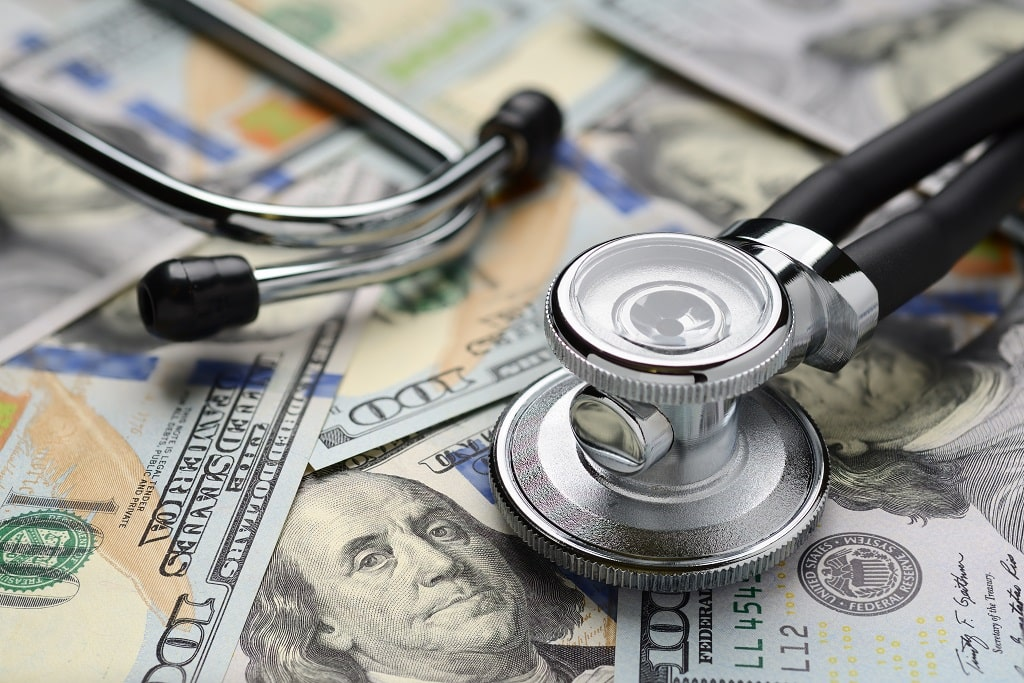

# Veri Seti Hikayesi;

### Bağımsız Değişkenler;

* age : Yaş
* sex: Cinsiyet (Male, female olarak kodlanmış)
* bmi : Vücut kitle indeksi (Vücut ağırlığı / boy uzunluğu²)
* children : Kişinin sahip olduğu çocuk sayısı (Numerik şekilde kodlanmış)
* smoker : Kişinin sigara içme durumu (Sigara içen : "yes", Sigara içmeyen : "no" olarak kodlanmış)
* region : Kişinin yaşadığı bölge (southeast, southwest, northwest, northeast olarak kodlanmış)

### Bağımlı Değişken;

* charges : Kişinin sağlık harcamaları

# Genel Sorular;

* Sigara içen kişi sayısı kaçtır? Cinsiyete göre değişkenlik gösteriyor mu? Çocuk sahip olma durumuna göre değişkenlik gösteriyor mu? Bölgeye göre değişkenlik gösteriyor mu? 18 yaş altında sigara içen kişi var mı?
* Vücut kitle indeksi yaşa göre değişkenlik gösteriyor mu? Sigara içme durumu vücut kitle indeksinde değişkenliğe sebep oluyor mu?
* Yaşa göre çocuk sahibi olma durumu nedir? 18 yaş altında çocuk sahibi kişi var mı?
* Bölgelerde yaşayan kişi sayıları ve cinsiyetleri nelerdir? 

# Önemli Sorular;

* Sağlık harcamaları cinsiyete bağlı olarak değişkenlik gösteriyor mu?
* Sağlık harcamaları sigara kullanımına bağlı olarak değişkenlik gösteriyor mu? Cinsiyetin farklı olması bu durumu değiştiriyor mu?
* Sağlık harcamaları yaşa bağlı olarak değişkenlik gösteriyor mu?
* Sağlık harcamaları kişinin vücut kitle indeksine bağlı olarak değişkenlik gösteriyor mu? Cinsiyetin farklı olması bu durumu değiştiriyor mu?
* Sağlık harcamaları kişinin çocuk sayısına bağlı olarak değişkenlik gösteriyor mu?
* Sağlık harcamaları bölgeye bağlı olarak değişkenlik gösteriyor mu?

In [183]:
# Kullanılacak Kütüphaneler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

### Veriye İlk Bakış

In [67]:
ins = pd.read_csv("insurance.csv")
df = ins.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [68]:
df.shape

(1338, 7)

In [69]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [71]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [72]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [73]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### Kategorik Değişkenlerin İncelenmesi

In [74]:
kat_df = df.select_dtypes(include="object")

In [75]:
kat_df.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


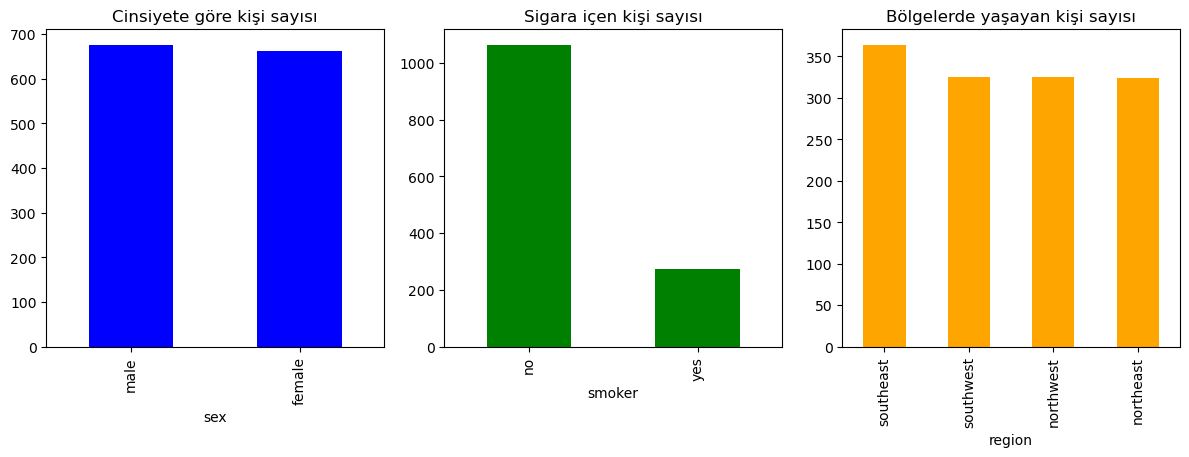

In [164]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
kat_df["sex"].value_counts().plot.bar(color = 'blue')
plt.title("Cinsiyete göre kişi sayısı")

plt.subplot(2, 3, 2)
kat_df["smoker"].value_counts().plot.bar(color = 'green')
plt.title("Sigara içen kişi sayısı")

plt.subplot(2, 3, 3)
kat_df["region"].value_counts().plot.bar(color = 'orange')
plt.title("Bölgelerde yaşayan kişi sayısı")

plt.tight_layout()

### Numerik Değişkenlerin İncelenmesi

In [77]:
num_df = df.select_dtypes(include= ["int64","float64"])

In [78]:
num_df.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


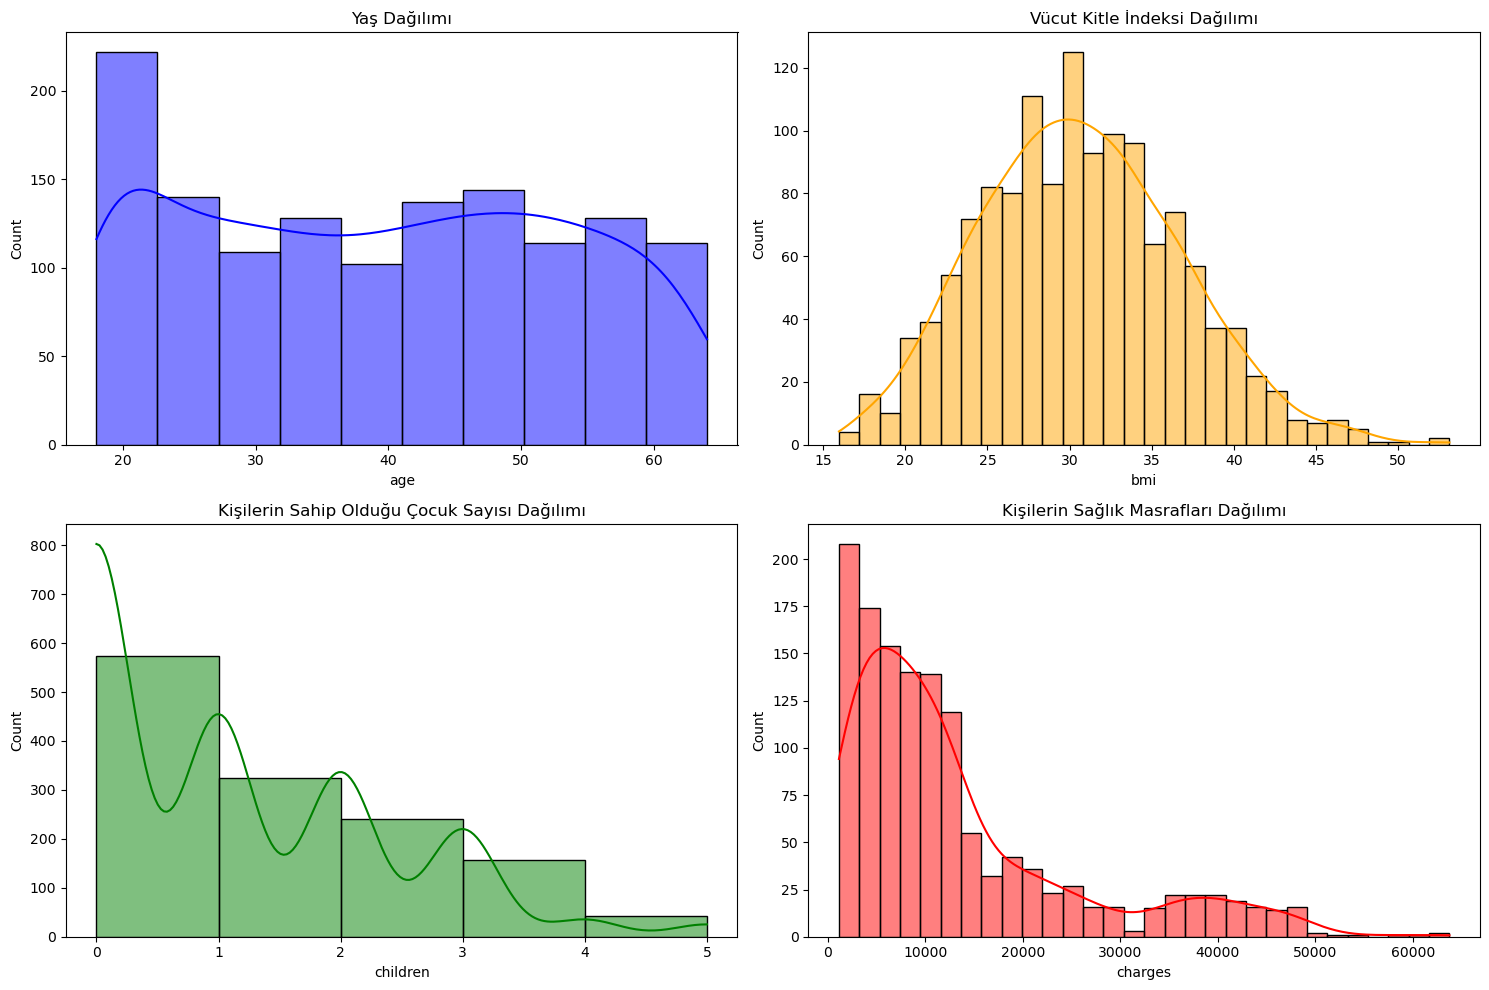

In [79]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(num_df["age"], bins=10, kde=True, color='blue')
plt.title('Yaş Dağılımı')

plt.subplot(2, 2, 2)
sns.histplot(num_df["bmi"], bins=30, kde=True, color='orange')
plt.title('Vücut Kitle İndeksi Dağılımı')

plt.subplot(2, 2, 3)
sns.histplot(num_df["children"], bins=5, kde=True, color='green')
plt.title('Kişilerin Sahip Olduğu Çocuk Sayısı Dağılımı')

plt.subplot(2, 2, 4)
sns.histplot(num_df["charges"], bins=30, kde=True, color='red')
plt.title('Kişilerin Sağlık Masrafları Dağılımı')

plt.tight_layout()

Text(0.5, 1.0, 'Kişilerin Sağlık Masrafları Dağılımı')

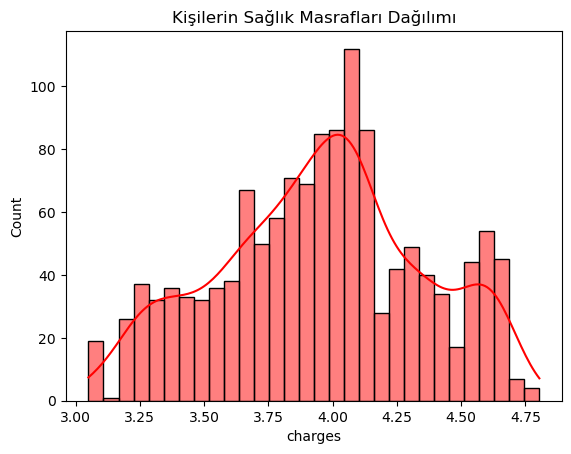

In [80]:
# Kişilerin sağlık masrafı dağılımında çarpıklık olduğunu görüyoruz. Logaritmik dönüşüm yapıp tekrardan görselleştirelim;

sns.histplot(np.log10(num_df["charges"]), bins=30, kde=True, color='red')
plt.title('Kişilerin Sağlık Masrafları Dağılımı')

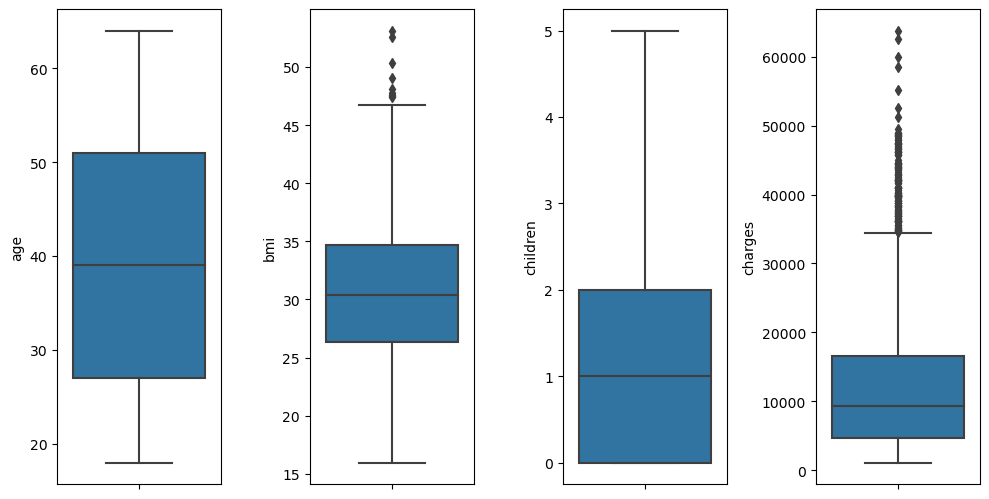

In [81]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 4, 1)
sns.boxplot(y = df["age"])

plt.subplot(2, 4, 2)
sns.boxplot(y = df["bmi"])

plt.subplot(2, 4, 3)
sns.boxplot(y = df["children"])

plt.subplot(2, 4, 4)
sns.boxplot(y = df["charges"])

plt.tight_layout()

### Çaprazlamalar ve Görselleştirme

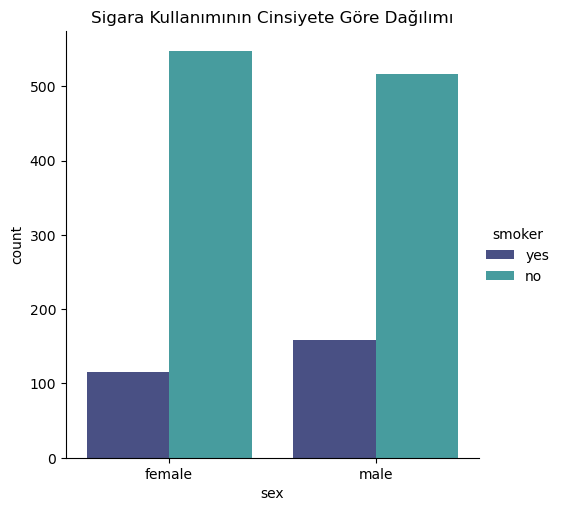

In [82]:
# Sigara kullanımı cinsiyete göre değişkenlik gösteriyor mu?

sns.catplot(x = 'sex', kind = 'count', hue = 'smoker', palette="mako", data = df)
plt.title('Sigara Kullanımının Cinsiyete Göre Dağılımı');

* Erkeklerde sigara kullanımının kadınlara göre daha fazla olduğu görülüyor.

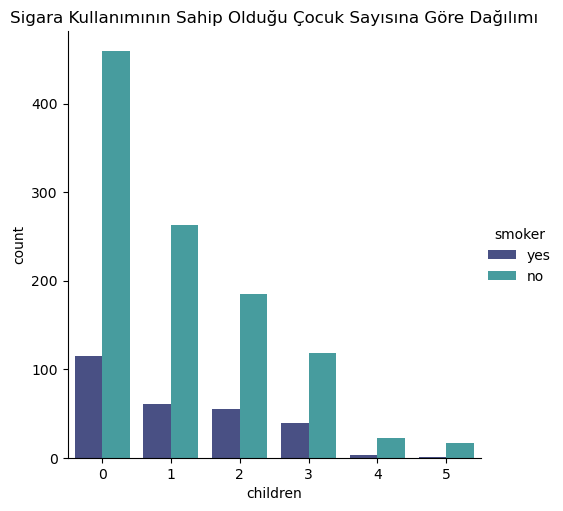

In [83]:
# Sigara kullanımı çocuk sahip olma durumuna göre değişkenlik gösteriyor mu?

sns.catplot(x = "children", kind = "count", hue = "smoker", palette="mako", data = df)
plt.title('Sigara Kullanımının Sahip Olduğu Çocuk Sayısına Göre Dağılımı');

* Çocuk sahibi kişilerin sayısı eşit olmadığı için net yorum yapmamız mümkün değil fakat elimizdeki veriye göre oranladığımızda daha fazla çocuk sahibi olan kişiler sigara içmeye yatkın gözüküyor.

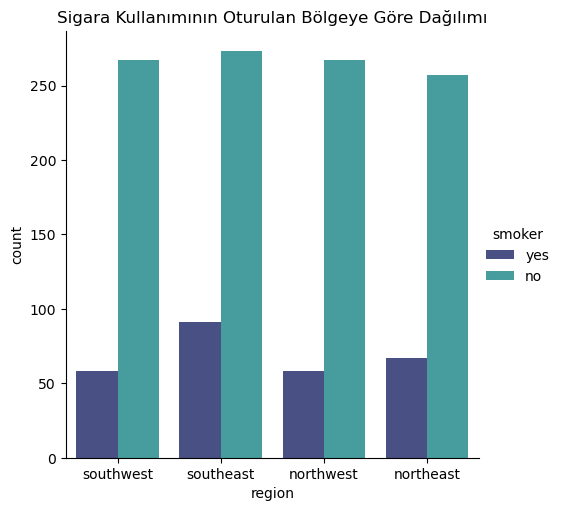

In [84]:
# Sigara kullanımı oturulan bölgeye göre değişkenlik gösteriyor mu?

sns.catplot(x = "region", kind = "count", hue = "smoker", palette="mako", data = df)
plt.title('Sigara Kullanımının Oturulan Bölgeye Göre Dağılımı');

* Southeast bölgesinde yaşayan insanlarda sigara kullanımı diğer bölgelere göre daha fazla.

In [85]:
# 18 yaşından küçük olup sigara içen var mı?

df["smoker"][(df.loc[:, "age"] < 18)].sum()

0

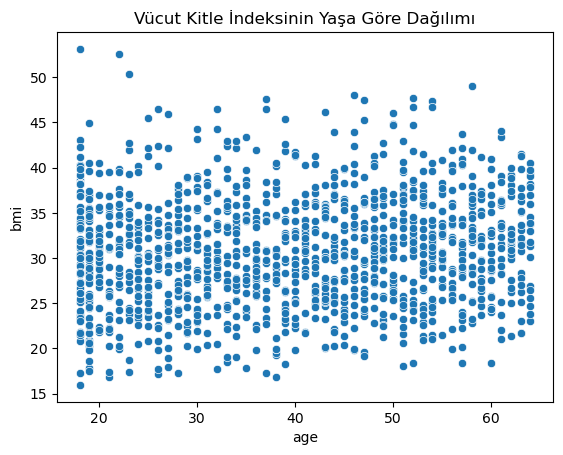

In [86]:
# Vücut kitle indeksi yaşa göre değişkenlik gösteriyor mu?

sns.scatterplot(x = "age", y = "bmi", data = df);
plt.title('Vücut Kitle İndeksinin Yaşa Göre Dağılımı');

* Dağılım grafiği incelendiğinde yaşa göre vücut kitle indeksi verisinin homojen dağıldığını gözlemliyoruz. Vücut kitle indeksi yaşa bağlı olarak değişkenlik göstermiyor.

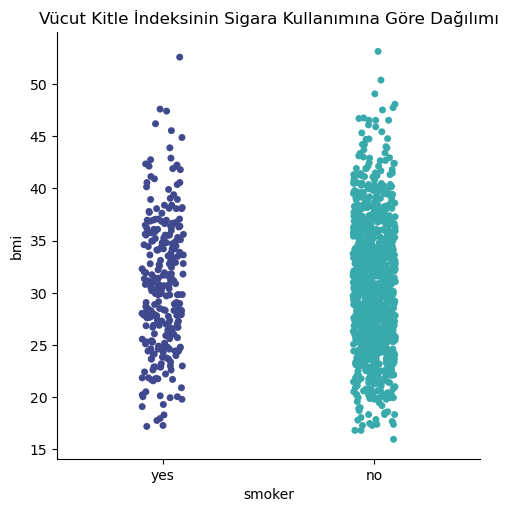

In [87]:
# Sigara içme durumu vücut kitle indeksinde değişkenliğe sebep oluyor mu?

sns.catplot(x = "smoker", y = "bmi", palette="mako", data = df)
plt.title('Vücut Kitle İndeksinin Sigara Kullanımına Göre Dağılımı');

* Sigara içme durumunun vücut kitle indeksinde bir değişkenliğe sebep olmadığı gözlemlenmiştir.

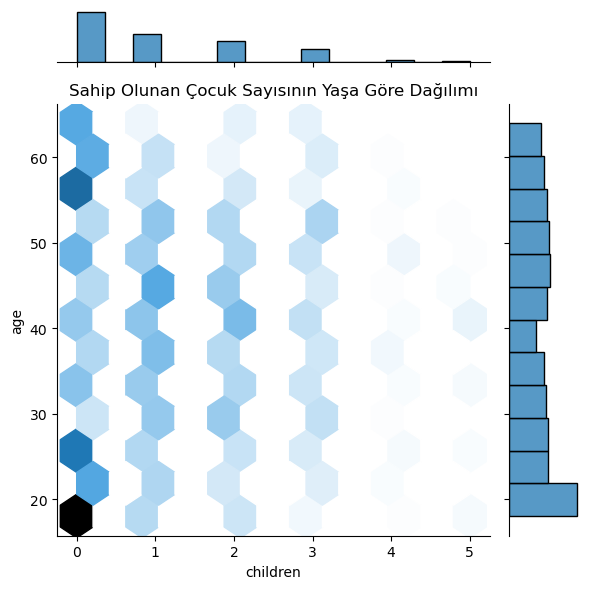

In [88]:
# Yaşa göre çocuk sahibi olma durumu nedir?

sns.jointplot(x = "children", y = "age",kind = "hex",data = df);
plt.title('Sahip Olunan Çocuk Sayısının Yaşa Göre Dağılımı');
plt.tight_layout()

* Hexagon Plot, Siyah renk en yoğun bölgeyi, koyu maviler yoğun, renk açıldıkça yoğunluğun azaldığını gösterir.
* Çocuk sahibi olmama durumu 20 yaş altında çok yoğun seviyede, 50-60 yaş arasında ise yoğun bir seviyede gözlemleniyor.
* 1 Çocuk sahibi olma durumu 40-50 yaş arasında yoğunluk gösteriyor.
* 2 Çocuk sahibi olma durumu 40-45 yaş arasında yoğunluk gösteriyor.
* 3 Çocuk sahibi olma durumu 45-50 yaş arasında yoğunluk gösteriyor.
* 4 Çocuk sahibi olma durumu 40-45 yaş arasında yoğunluk gösteriyor.

In [89]:
#18 yaşından küçük olup çocuk sahibi kişi var mı?

df["children"][(df.loc[:, "age"] < 18)].sum()

0

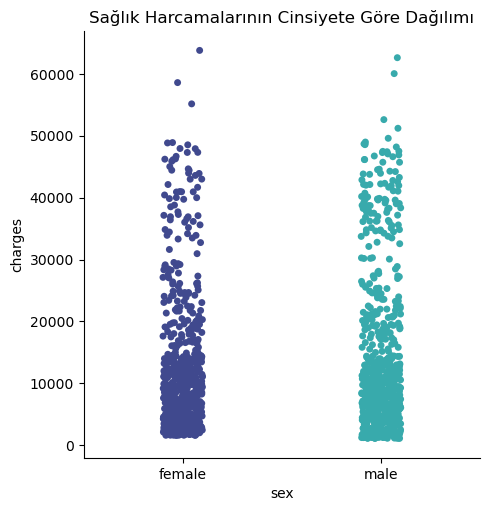

In [90]:
# Sağlık harcamaları cinsiyete bağlı olarak değişkenlik gösteriyor mu?

sns.catplot(x = "sex", y = "charges", palette="mako", data = df);
plt.title('Sağlık Harcamalarının Cinsiyete Göre Dağılımı');

* Sağlık harcamalarında cinsiyete bağlı olarak bir farklılık gözlemlenmemiştir.

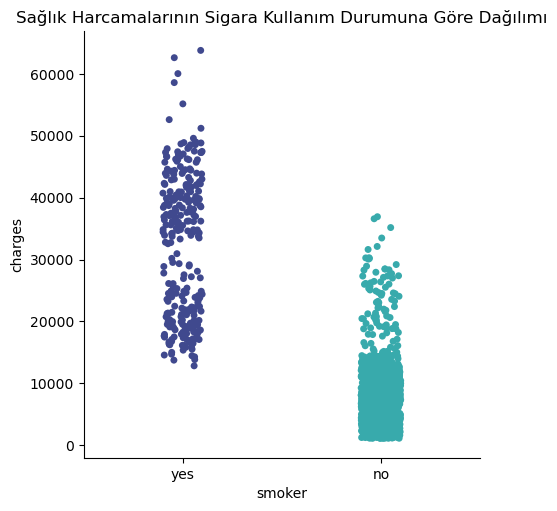

In [91]:
# Sağlık harcamaları sigara kullanımına bağlı olarak değişkenlik gösteriyor mu?

sns.catplot(x = "smoker", y = "charges", palette="mako", data = df);
plt.title('Sağlık Harcamalarının Sigara Kullanım Durumuna Göre Dağılımı');

* Sigara kullanımının sağlık harcamalarında artışa neden olduğu gözlemlenmektedir. 

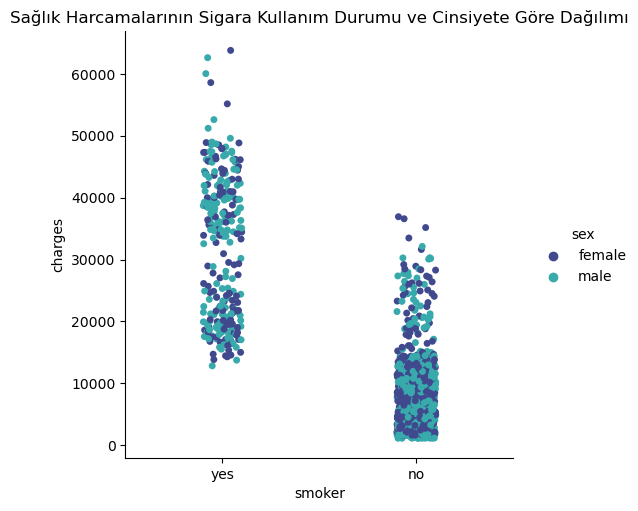

In [92]:
# Cinsiyetin farklı olması bu durumu değiştiriyor mu?

sns.catplot(x = "smoker", y = "charges", palette="mako", hue = "sex", data = df);
plt.title('Sağlık Harcamalarının Sigara Kullanım Durumu ve Cinsiyete Göre Dağılımı');

* Cinsiyet baz alındığında sigara kullanımının sağlık harcamalarında artışa neden olduğu gözlemlenmemiştir. 

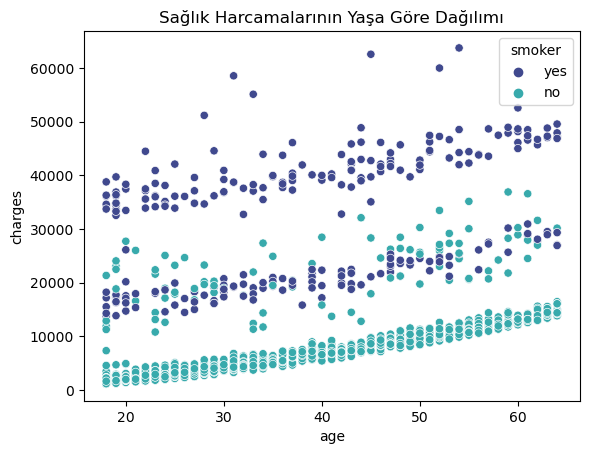

In [93]:
# Sağlık harcamaları yaşa bağlı olarak değişkenlik gösteriyor mu?

sns.scatterplot(x = "age", y = "charges", hue = "smoker",palette="mako", data = df);
plt.title('Sağlık Harcamalarının Yaşa Göre Dağılımı');

* Sağlık harcamalarında yaşa bağlı olarak artış olduğu gözlemlenmiştir.
* Sigara kullanımı baz alındığında ise sağlık harcamalarındaki artış yaştan daha çok sigara kullanımından kaynaklandığı gözlemlenmiştir.

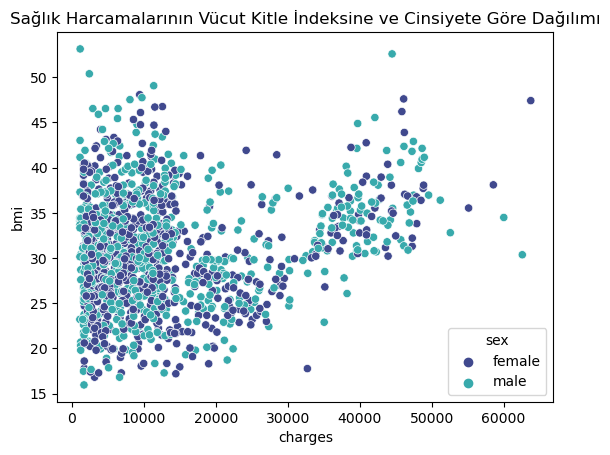

In [94]:
# Sağlık harcamaları kişinin vücut kitle indeksine bağlı olarak değişkenlik gösteriyor mu? Cinsiyetin farklı olması bu durumu değiştiriyor mu?

sns.scatterplot(x = "charges", y = "bmi", hue = "sex",palette="mako", data = df);
plt.title('Sağlık Harcamalarının Vücut Kitle İndeksine ve Cinsiyete Göre Dağılımı');

* 40000 Dolar sonrası sağlık harcamalarının tamamı vücut kitle indeksi 30'dan fazla olan kişiler tarafından oluşturulduğu gözlemlenmiştir fakat yine de net olarak yorum yapmamız mümkün değil.
* Cinsiyet baz alındığında sağlık harcamalarında bir değişkenlik gözlemlenmemiştir.

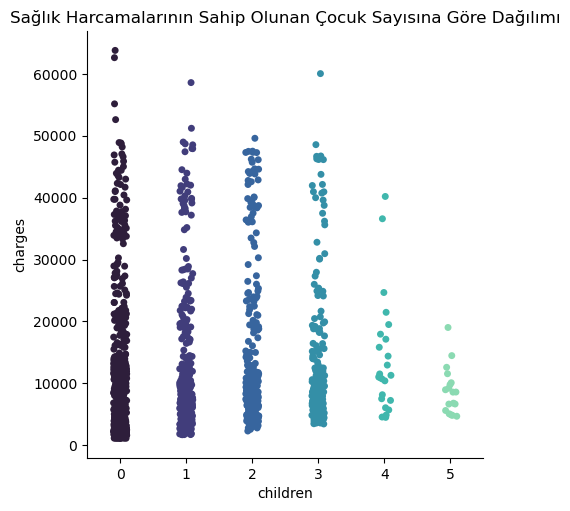

In [95]:
# Sağlık harcamaları kişinin çocuk sayısına bağlı olarak değişkenlik gösteriyor mu?

sns.catplot(x = "children", y = "charges", palette="mako", data = df);
plt.title('Sağlık Harcamalarının Sahip Olunan Çocuk Sayısına Göre Dağılımı');

* Elimizdeki veriye baktığımızda çocuk sahibi olmayan kişilerin çocuk sahibi kişilere göre daha fazla sağlık harcaması yaptığı gözlemlenmiştir.
* Fakat sahip olunan çocuk sayılarında eşit gözlem bulunmadığı için yapılacak genelleme yanlış olacaktır.

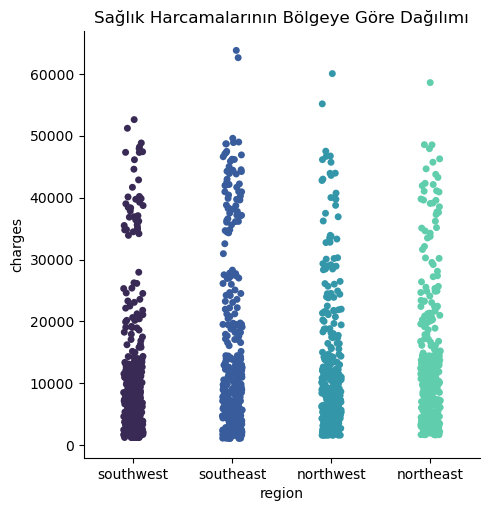

In [96]:
# Sağlık harcamaları bölgeye bağlı olarak değişkenlik gösteriyor mu?

sns.catplot(x = "region", y = "charges", palette="mako", data = df);
plt.title('Sağlık Harcamalarının Bölgeye Göre Dağılımı');

* Sağlık harcamalarında bölgeye bağlı olarak bir farklılık gözlemlenmemiştir.

# Veri Ön İşleme

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [98]:
# Charges değişkeni çarpık olduğu için Logaritmik dönüşüm uygulandı.

df["charges"] = np.log10(df["charges"])

In [100]:
# Tipi object olan değişkenler kategorik değişken yapıldı.

df[["sex", "smoker", "region"]] = df[["sex", "smoker", "region"]].astype('category')

In [149]:
# Cinsiyet Değişkeni female = 0, male = 1 olarak kodlandı.

lbe = LabelEncoder()
lbe.fit(df.sex.drop_duplicates())
df.sex = lbe.transform(df.sex)

# Sigara İçme Değişkeni no = 0, yes = 1 olarak kodlandı.

lbe.fit(df.smoker.drop_duplicates())
df.smoker = lbe.transform(df.smoker)

# Bölge değişkenine One Hot dönüşümü uygulandı ve bağımsız değişkenler X'e atandı.

dms = pd.get_dummies(df, columns=["region"], drop_first=True, dtype="int64")
X_ = df.drop(["charges","region"],axis = 1)
X = pd.concat([X_, dms[["region_northwest","region_southeast","region_southwest"]]], axis = 1).astype('float64')

# Bağımlı değişken y'e atandı.

y = df["charges"]

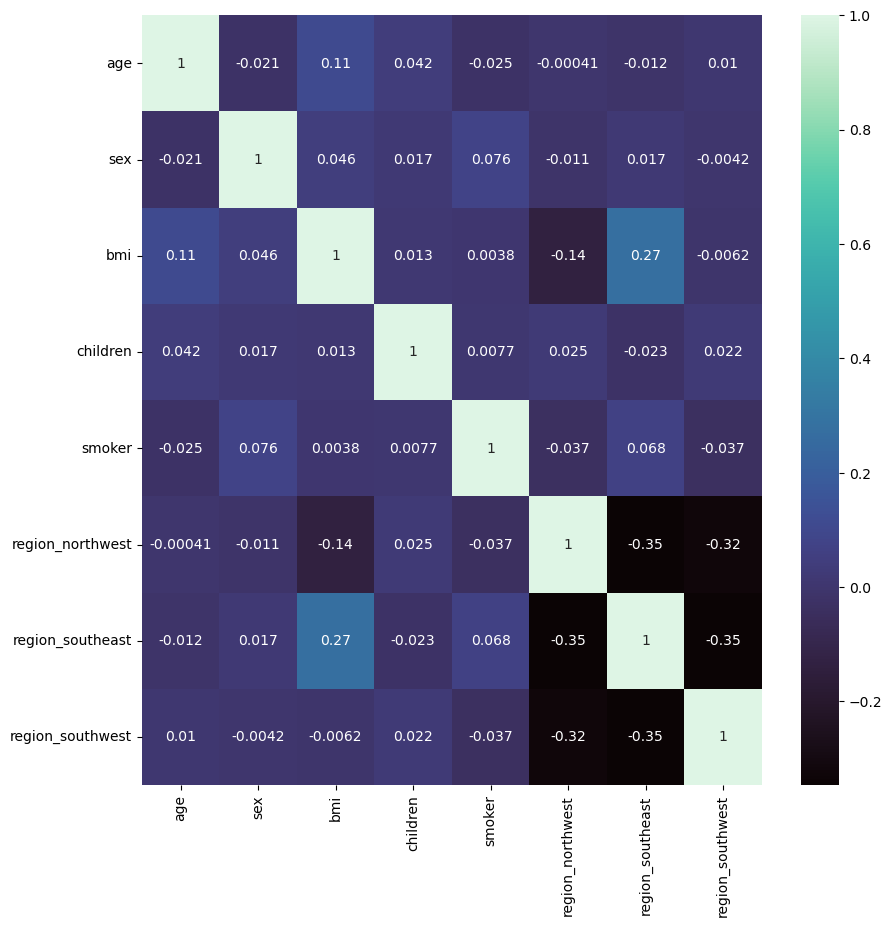

In [154]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(X.corr(), annot=True, cmap='mako')

* Bağımsız değişkenler arasında çoklu doğrusal bağlantı (Multicollinearity) sorunu görülmemektedir.

# PCR Model

In [343]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA()
lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.20,
                                                    random_state = 7)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1070, 8)
(1070,)
(268, 8)
(268,)


In [344]:
X_reduced_train = pca.fit_transform(scale(X_train))

In [345]:
# Kümülatif olarak bağımsız değişkenlerin açıkladığı varyans oranı;

np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:]

array([ 19.07,  35.71,  49.74,  62.96,  74.98,  86.48,  96.12, 100.  ])

In [346]:
pcr_model = lr.fit(X_reduced_train, y_train)

In [347]:
X_reduced_test = pca.fit_transform(scale(X_test))

In [348]:
y_pred = pcr_model.predict(X_reduced_test)

In [349]:
print("MAE :",mean_absolute_error(y_test, y_pred))
print("MSE :",mean_squared_error(y_test, y_pred))
print("RMSE :",np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 :",r2_score(y_test,y_pred))

MAE : 0.3976422265331158
MSE : 0.24310769654907408
RMSE : 0.49305952637493383
R^2 : -0.4811026366662814


## PCR Model Tuning

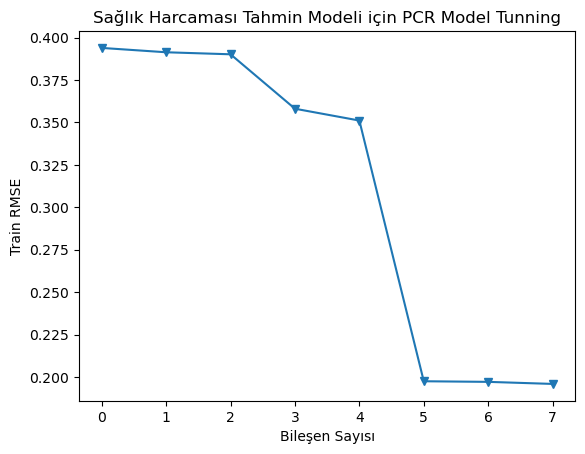

In [236]:
from sklearn import model_selection

cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 7)

RMSE = []

for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lr,
                                                      X_reduced_train[:,:i],
                                                      y_train.ravel(),
                                                      cv = cv_10,
                                                      scoring="neg_mean_squared_error").mean())
    RMSE.append(score)
    
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('Train RMSE')
plt.title('Sağlık Harcaması Tahmin Modeli için PCR Model Tunning');

In [351]:
# Optimum Bileşen Sayısı '5'

pcr_model = lr.fit(X_reduced_train[:,0:5], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:5])

print("MAE :",mean_absolute_error(y_test, y_pred))
print("MSE :",mean_squared_error(y_test, y_pred))
print("RMSE :",np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 :",r2_score(y_test,y_pred))

MAE : 0.30949167567126257
MSE : 0.14928235203570459
RMSE : 0.38637074428028917
R^2 : 0.09051630883601425


# PLS Model

In [285]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [286]:
pls_model = PLSRegression().fit(X_train, y_train)

In [287]:
y_pred = pls_model.predict(X_test)

In [288]:
print("MAE :",mean_absolute_error(y_test, y_pred))
print("MSE :",mean_squared_error(y_test, y_pred))
print("RMSE :",np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 :",r2_score(y_test,y_pred))

MAE : 0.12003821046142638
MSE : 0.034277536108116735
RMSE : 0.1851419350339537
R^2 : 0.7911684828213279


## PLS Model Tuning

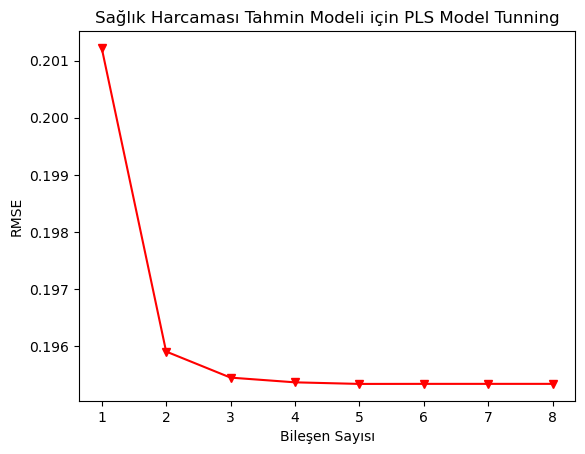

In [289]:
cv_10 = model_selection.KFold(n_splits = 10, shuffle=True, random_state=1)

RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv = cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

# Sonuçların görselleştirilmesi
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Sağlık Harcaması Tahmin Modeli için PLS Model Tunning');

In [296]:
pls_model = PLSRegression(n_components=2).fit(X_train, y_train)

In [297]:
y_pred = pls_model.predict(X_test)

In [298]:
print("MAE :",mean_absolute_error(y_test, y_pred))
print("MSE :",mean_squared_error(y_test, y_pred))
print("RMSE :",np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 :",r2_score(y_test,y_pred))

MAE : 0.12003821046142638
MSE : 0.034277536108116735
RMSE : 0.1851419350339537
R^2 : 0.7911684828213279


# Ridge Regresyon

In [303]:
from sklearn.linear_model import Ridge, RidgeCV

In [300]:
ridge_model = Ridge(alpha=0.1).fit(X_train, y_train)

In [301]:
y_pred = ridge_model.predict(X_test)

In [302]:
print("MAE :",mean_absolute_error(y_test, y_pred))
print("MSE :",mean_squared_error(y_test, y_pred))
print("RMSE :",np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 :",r2_score(y_test,y_pred))

MAE : 0.12168177323309703
MSE : 0.03456886644724649
RMSE : 0.18592704603485338
R^2 : 0.7893935898847777


## Ridge Regresyon Model Tuning

In [313]:
lambdalar = 10**np.linspace(10, -2, 100)*0.5

In [314]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = lambdalar,
                  scoring = "neg_mean_squared_error")

In [315]:
ridge_cv.fit(X_train, y_train);

In [316]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_).fit(X_train, y_train)

In [317]:
y_pred = ridge_tuned.predict(X_test)

In [318]:
print("MAE :",mean_absolute_error(y_test, y_pred))
print("MSE :",mean_squared_error(y_test, y_pred))
print("RMSE :",np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 :",r2_score(y_test,y_pred))

MAE : 0.12166917112675141
MSE : 0.03455731033738224
RMSE : 0.18589596643655892
R^2 : 0.7894639940103257


# Lasso Regresyon

In [319]:
from sklearn.linear_model import Lasso, LassoCV

In [320]:
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)

In [321]:
y_pred = lasso_model.predict(X_test)

In [322]:
print("MAE :",mean_absolute_error(y_test, y_pred))
print("MSE :",mean_squared_error(y_test, y_pred))
print("RMSE :",np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 :",r2_score(y_test,y_pred))

MAE : 0.24893265353705998
MSE : 0.0945742420377121
RMSE : 0.3075292539543386
R^2 : 0.42381849184073495


## Lasso Regresyon Model Tuning

In [324]:
lasso_cv = LassoCV(alphas=None, cv = 10, max_iter=10000)

In [325]:
lasso_cv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=10000)

In [329]:
lasso_tuned = Lasso(alpha = lasso_cv.alpha_).fit(X_train, y_train)

In [330]:
y_pred = lasso_tuned.predict(X_test)

In [331]:
print("MAE :",mean_absolute_error(y_test, y_pred))
print("MSE :",mean_squared_error(y_test, y_pred))
print("RMSE :",np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 :",r2_score(y_test,y_pred))

MAE : 0.11955676666448242
MSE : 0.0344536476246489
RMSE : 0.18561693787111375
R^2 : 0.7900955458671067


# ElasticNet Regresyon

In [332]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [333]:
elastic_model = ElasticNet().fit(X_train, y_train)

In [334]:
y_pred = elastic_model.predict(X_test)

In [335]:
print("MAE :",mean_absolute_error(y_test, y_pred))
print("MSE :",mean_squared_error(y_test, y_pred))
print("RMSE :",np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 :",r2_score(y_test,y_pred))

MAE : 0.26953143202084384
MSE : 0.11188537789064662
RMSE : 0.334492717246051
R^2 : 0.3183526044195448


## ElasticNet Model Tuning

In [338]:
elastic_cv = ElasticNetCV(cv = 10, random_state = 7)

In [339]:
elastic_cv.fit(X_train, y_train)

ElasticNetCV(cv=10, random_state=7)

In [340]:
elastic_tuned = ElasticNet(alpha = elastic_cv.alpha_).fit(X_train, y_train)

In [341]:
y_pred = elastic_tuned.predict(X_test)

In [342]:
print("MAE :",mean_absolute_error(y_test, y_pred))
print("MSE :",mean_squared_error(y_test, y_pred))
print("RMSE :",np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 :",r2_score(y_test,y_pred))

MAE : 0.11989611602208505
MSE : 0.034466334073162054
RMSE : 0.18565110846198052
R^2 : 0.7900182552974971


# Model Seçimi

In [362]:
# Hata Metrikleri (MAE, MSE, RMSE) küçük olmalı.
# R^2 değeri büyük olmalıdır.

In [352]:
predicts = {'Algoritma' : ['PCR_Regresyon', 'PLS_Regresyon', 'Ridge_Regresyon', 'Lasso_Regresyon', 'ElasticNet_Regresyon'],
            'MAE' : [0.3094, 0.1200, 0.1216, 0.1195, 0.1198],
            'MSE' : [0.1492, 0.0342, 0.0345, 0.0344, 0.0344],
            'RMSE' : [0.3863, 0.1851, 0.1858, 0.1856, 0.1856],
            'R^2' : [0.090, 0.7911, 0.7894, 0.79009, 0.79001]}

In [360]:
df_pred = pd.DataFrame(predicts).sort_values(by = "R^2", ascending=False)
df_pred = df_pred.reset_index(drop=True)

In [395]:
df_pred

,Algoritma,MAE,MSE,RMSE,R^2
0,PLS_Regresyon,0.1200,0.0342,0.1851,0.79110
1,Lasso_Regresyon,0.1195,0.0344,0.1856,0.79009
2,ElasticNet_Regresyon,0.1198,0.0344,0.1856,0.79001
3,Ridge_Regresyon,0.1216,0.0345,0.1858,0.78940
4,PCR_Regresyon,0.3094,0.1492,0.3863,0.09000


* **PLS Regresyon (Kısmi En Küçük Kareler) bu veri seti için diğer algoritmalardan daha iyi performans göstermiştir.**

In [380]:
pls_model.coef_

array([[ 0.20974995, -0.01242634,  0.03626718,  0.05411796,  0.27519726,
        -0.00044902, -0.02162063, -0.01371808]])

In [381]:
pls_model.intercept_

array([3.9510143])

# Kurulan Model;

ý = 3.9510143 + (0.20974995 * **age**) - (0.01242634 * **sex**) + (0.03626718 * **bmi**) + (0.05411796 * **children**) + (0.27519726 * **smoker**) - (0.00044902 * **region_northwest**) - (0.02162063 * **region_southeast**) - (0.01371808 * **region_southwest**)

**Sağlık harcamalarında artışa sebep olan değişkenler sırasıyla;**

* 1. Smoker (Sigara Kullanımı)
* 2. Age (Yaş)
* 3. Children (Sahip Olunan Çocuk Sayısı) 
* 4. Bmi (Vücut Kitle İndeksi)

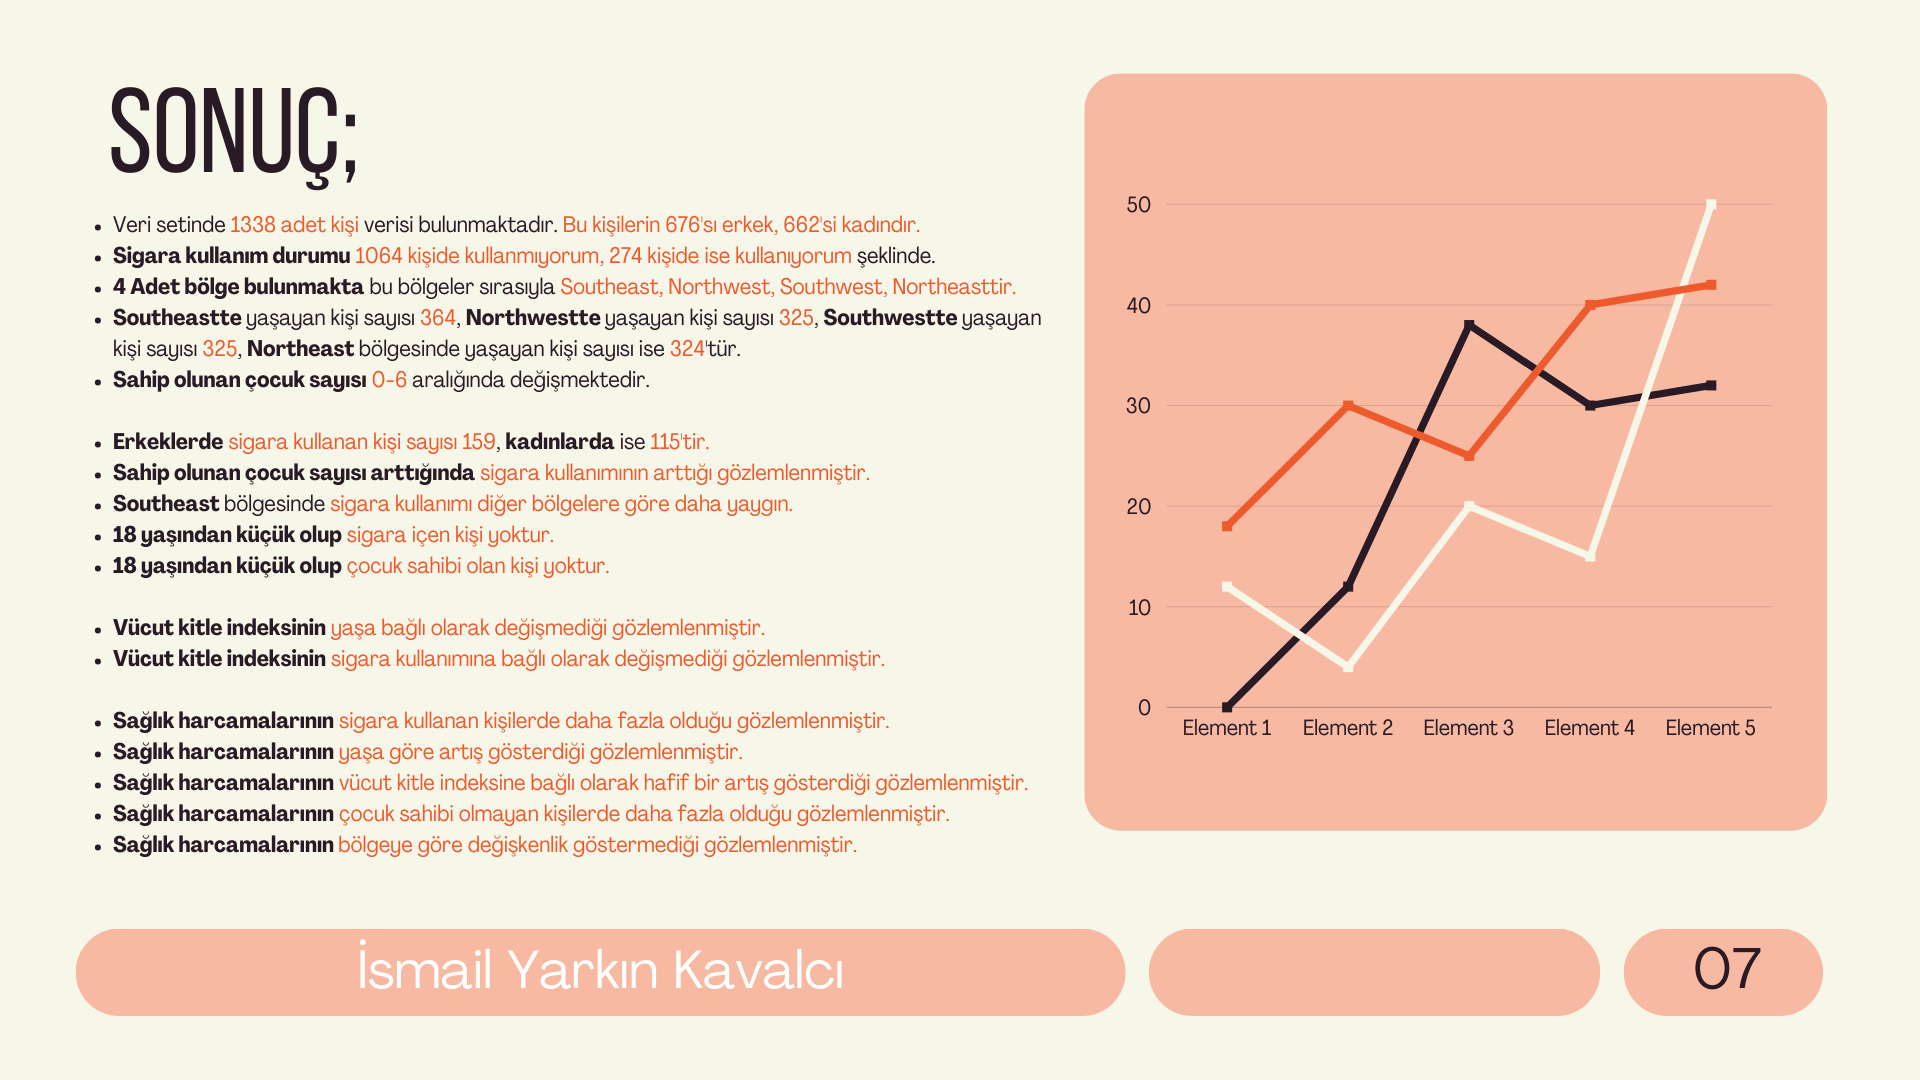